In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
pd.set_option('display.max_columns',200)

READING CSV FILE

In [2]:
df=pd.read_csv(r'C:\Users\Theerthan Vasudevan\OneDrive\Desktop\12_period+changer-2\Period-Changer-10F.csv')

UNDERSTANDING DATASET

In [3]:
df.shape

(90, 11)

In [4]:
df.head()

,ATSC8c,MATS1e,minsCH3,MATS4e,MATS4s,ATSC7i,SpMin4_Bhp,MLFER_S,ATSC4p,SpMax2_Bhm,Class
0,0.1053,-0.0226,0.0000,-0.1538,-0.0969,-1.6116,1.9431,0.000,2.8374,4.1919,NoChanger
1,-0.0037,0.0504,0.0000,0.1620,0.1151,-24.8440,1.8920,4.560,-0.6029,4.0704,NoChanger
2,0.5650,-0.1202,1.7339,0.1163,0.0546,-47.0843,1.9117,6.378,-5.1400,4.1808,NoChanger
3,-0.0643,-0.1401,1.6986,0.0831,0.0213,-53.0209,1.9118,5.989,-5.7606,4.1809,NoChanger
4,0.0260,-0.0104,0.0000,-0.0318,0.0512,-7.4117,1.8640,4.094,-2.4625,4.0410,NoChanger


In [5]:
df.tail()

,ATSC8c,MATS1e,minsCH3,MATS4e,MATS4s,ATSC7i,SpMin4_Bhp,MLFER_S,ATSC4p,SpMax2_Bhm,Class
85,-0.0387,0.0792,1.3693,-0.1178,-0.1357,-2.2889,1.5803,2.632,2.8642,4.1831,Changer
86,-0.0776,0.0828,1.2490,-0.0913,-0.1552,13.0941,1.5778,2.887,-1.2117,4.1654,Changer
87,-0.0018,0.0643,1.3908,-0.1275,-0.1346,-3.4900,1.5802,2.844,2.7781,4.7067,Changer
88,-0.0004,0.1005,1.3931,-0.0696,-0.1086,-2.5026,1.8524,3.050,2.8889,4.2783,Changer
89,-0.0562,0.0503,1.2901,-0.0890,-0.1520,10.3825,1.5833,2.632,-1.6212,4.1643,Changer


In [6]:
df.columns

Index(['ATSC8c', 'MATS1e', 'minsCH3', 'MATS4e', 'MATS4s', 'ATSC7i',
       'SpMin4_Bhp', 'MLFER_S', 'ATSC4p', 'SpMax2_Bhm', 'Class'],
      dtype='object')

UNDERSTANDING DATATYPES


In [7]:
df.dtypes

ATSC8c        float64
MATS1e        float64
minsCH3       float64
MATS4e        float64
MATS4s        float64
ATSC7i        float64
SpMin4_Bhp    float64
MLFER_S       float64
ATSC4p        float64
SpMax2_Bhm    float64
Class          object
dtype: object

In [8]:
df['Class']=df["Class"].replace('NoChanger','0')
df['Class']=df["Class"].replace('Changer','1')

In [9]:
df.head()

,ATSC8c,MATS1e,minsCH3,MATS4e,MATS4s,ATSC7i,SpMin4_Bhp,MLFER_S,ATSC4p,SpMax2_Bhm,Class
0,0.1053,-0.0226,0.0000,-0.1538,-0.0969,-1.6116,1.9431,0.000,2.8374,4.1919,0
1,-0.0037,0.0504,0.0000,0.1620,0.1151,-24.8440,1.8920,4.560,-0.6029,4.0704,0
2,0.5650,-0.1202,1.7339,0.1163,0.0546,-47.0843,1.9117,6.378,-5.1400,4.1808,0
3,-0.0643,-0.1401,1.6986,0.0831,0.0213,-53.0209,1.9118,5.989,-5.7606,4.1809,0
4,0.0260,-0.0104,0.0000,-0.0318,0.0512,-7.4117,1.8640,4.094,-2.4625,4.0410,0


In [10]:
df.tail()

,ATSC8c,MATS1e,minsCH3,MATS4e,MATS4s,ATSC7i,SpMin4_Bhp,MLFER_S,ATSC4p,SpMax2_Bhm,Class
85,-0.0387,0.0792,1.3693,-0.1178,-0.1357,-2.2889,1.5803,2.632,2.8642,4.1831,1
86,-0.0776,0.0828,1.2490,-0.0913,-0.1552,13.0941,1.5778,2.887,-1.2117,4.1654,1
87,-0.0018,0.0643,1.3908,-0.1275,-0.1346,-3.4900,1.5802,2.844,2.7781,4.7067,1
88,-0.0004,0.1005,1.3931,-0.0696,-0.1086,-2.5026,1.8524,3.050,2.8889,4.2783,1
89,-0.0562,0.0503,1.2901,-0.0890,-0.1520,10.3825,1.5833,2.632,-1.6212,4.1643,1


In [11]:
df.isna().sum()

ATSC8c        0
MATS1e        0
minsCH3       0
MATS4e        0
MATS4s        0
ATSC7i        0
SpMin4_Bhp    0
MLFER_S       0
ATSC4p        0
SpMax2_Bhm    0
Class         0
dtype: int64

In [12]:
df.describe()


,ATSC8c,MATS1e,minsCH3,MATS4e,MATS4s,ATSC7i,SpMin4_Bhp,MLFER_S,ATSC4p,SpMax2_Bhm
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,-0.055602,0.035978,0.912224,-0.030776,-0.014769,1.100723,1.819067,3.939044,-2.220361,4.023163
std,0.209058,0.087482,0.936687,0.110803,0.098002,21.973359,0.101353,0.947455,2.827044,0.122159
min,-0.837500,-0.171400,0.000000,-0.359100,-0.236200,-57.079200,1.577800,0.000000,-8.822600,3.840900
25%,-0.161925,-0.026625,0.000000,-0.109600,-0.093600,-7.725725,1.766625,3.397250,-4.043150,3.951975
50%,-0.038550,0.014250,0.624500,-0.047750,-0.015450,4.403900,1.849350,3.862000,-2.551750,4.003250
75%,0.025425,0.082775,1.950200,0.020450,0.052250,12.204625,1.900225,4.331000,-0.788375,4.080450
max,0.565000,0.256300,2.116500,0.245600,0.201900,50.023800,1.974000,6.378000,6.952900,4.706700


OUTLIER ANALYSIS

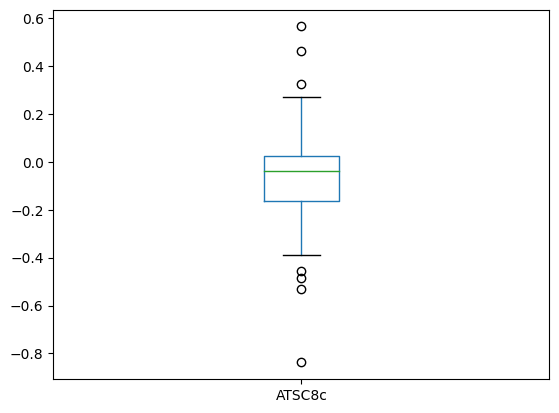

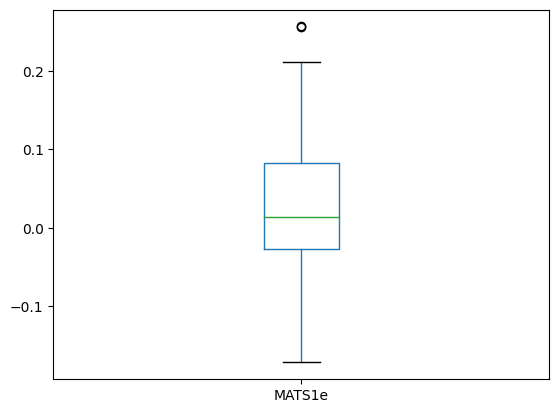

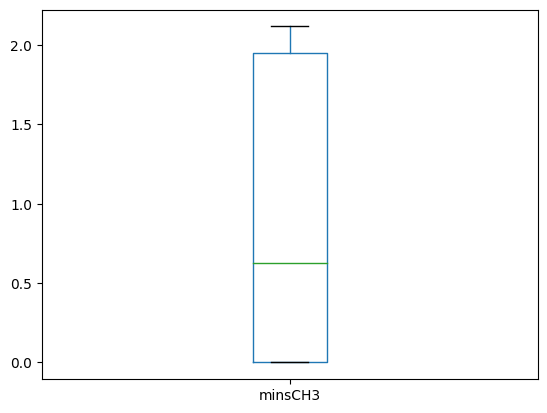

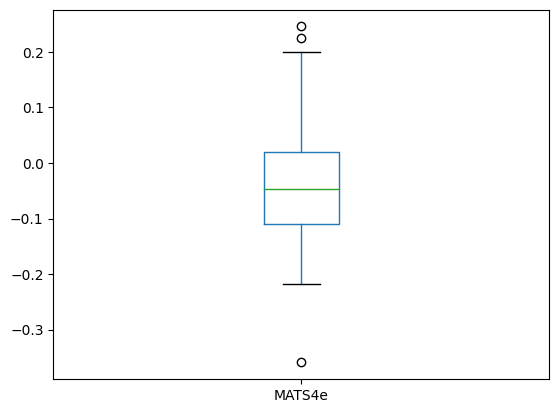

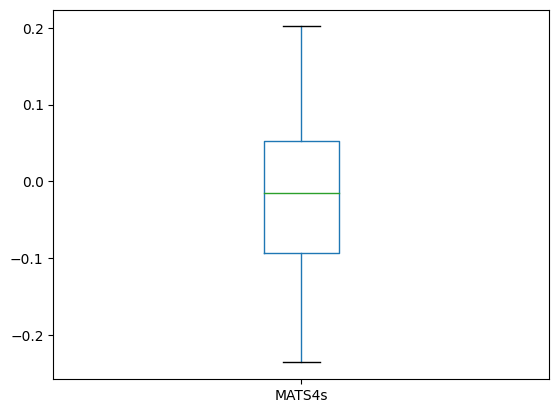

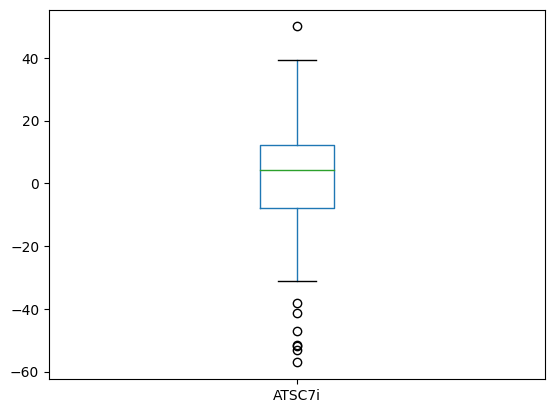

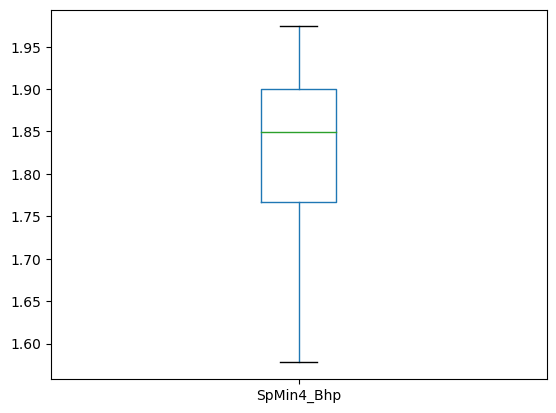

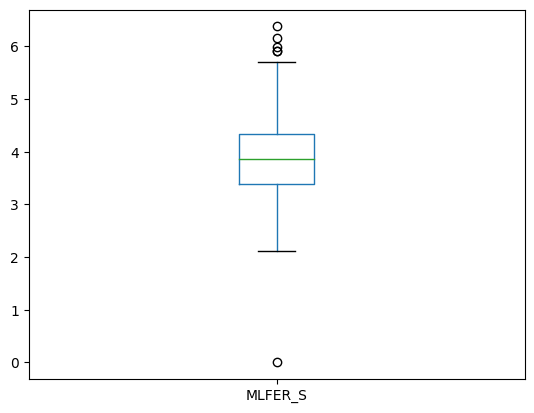

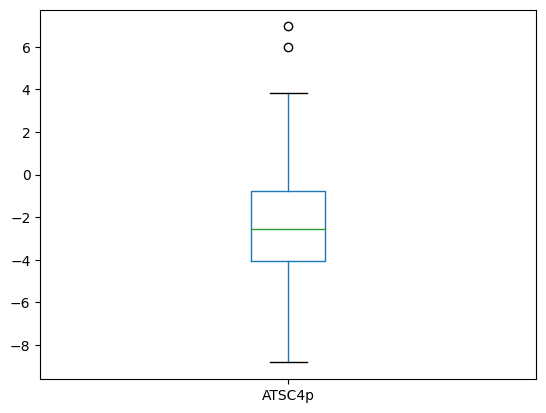

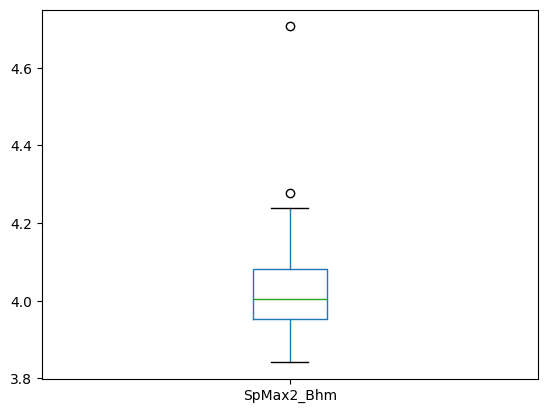

In [13]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,'ATSC8c')
plot_boxplot(df,'MATS1e')
plot_boxplot(df,'minsCH3')
plot_boxplot(df,'MATS4e')
plot_boxplot(df,'MATS4s') 
plot_boxplot(df,'ATSC7i') 
plot_boxplot(df,'SpMin4_Bhp')
plot_boxplot(df,'MLFER_S')
plot_boxplot(df,'ATSC4p')
plot_boxplot(df,'SpMax2_Bhm')

OUTLIER REMOVAL

In [15]:
def remove_outliers_and_reduce(data, threshold):
    # Iterate through columns and remove rows where any value is an outlier
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    return data

# Define the threshold for reducing outliers
threshold = 10  # You can adjust this value

# Create a new DataFrame with outliers removed, and columns reduced
data_no_outliers_reduced = remove_outliers_and_reduce(df.copy(), threshold)

# Save the new dataset to a CSV file (optional)
#data_no_outliers_reduced.to_csv('new_dataset_no_outliers_reduced.csv', index=False)

c:\Users\Theerthan Vasudevan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Theerthan Vasudevan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Theerthan Vasudevan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Theerthan Vasudevan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.

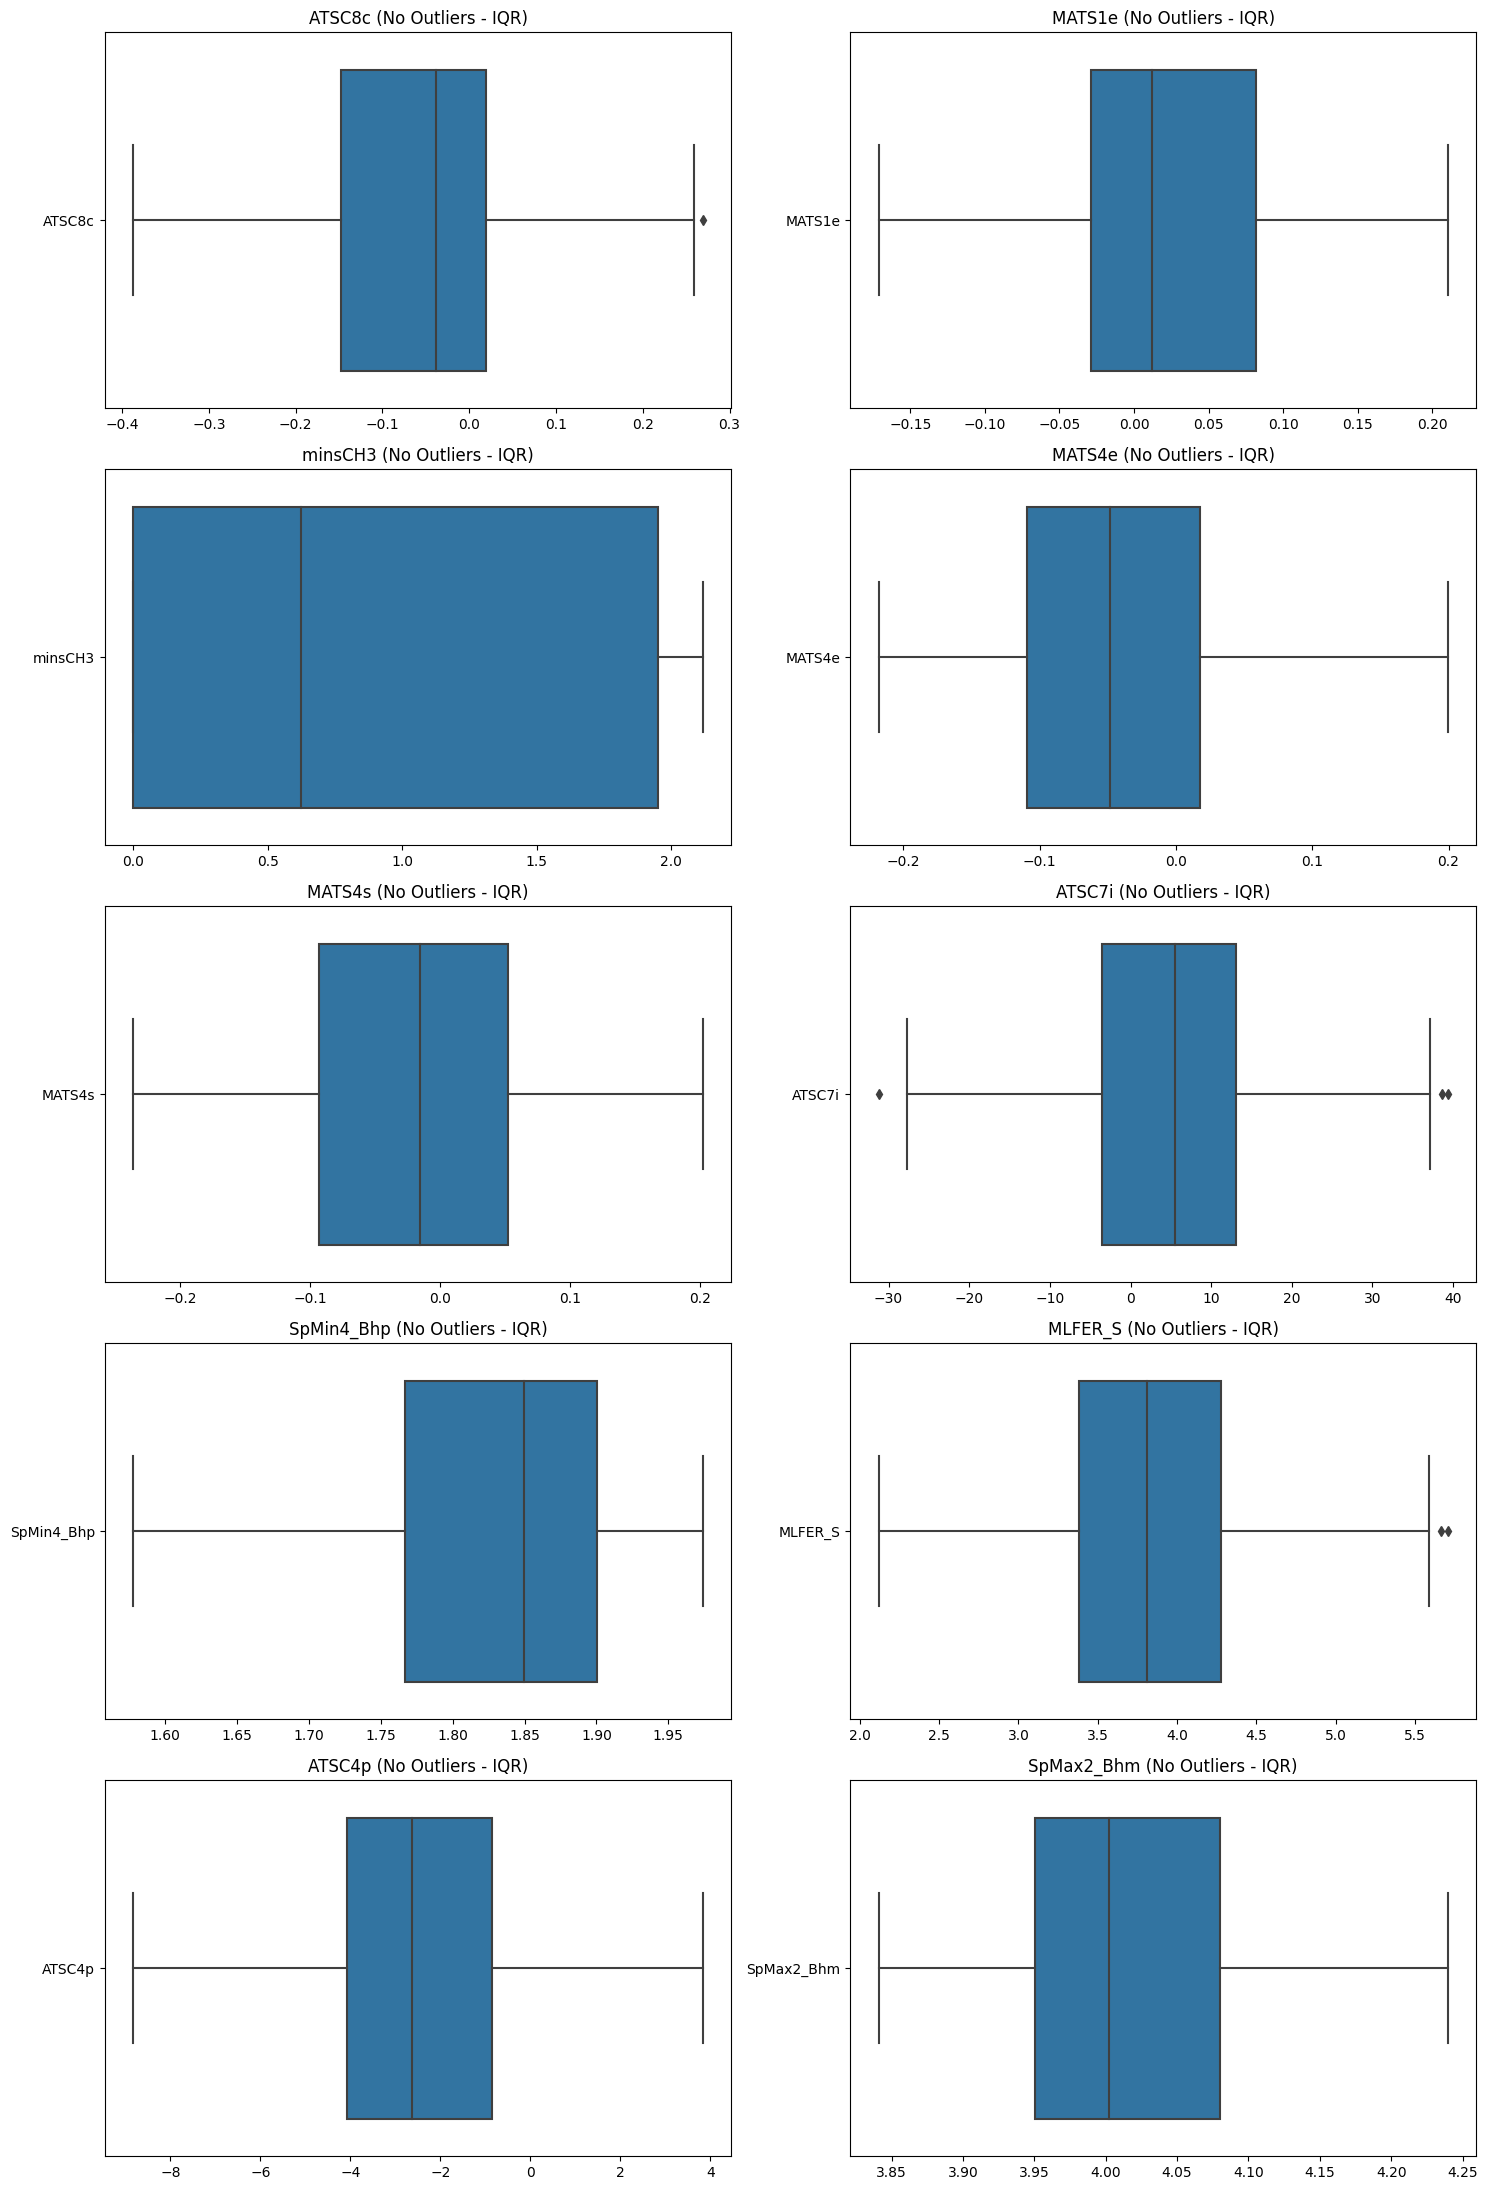

In [16]:
# Generate separate, but combined box plots for each numeric column
def remove_outliers_iqr(column):
    if column.dtype in ['int64', 'float64']:
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return column[(column >= lower_bound) & (column <= upper_bound)]
    else:
        return column

# Create a new DataFrame without outliers using the IQR method for each column
data_no_outliers_iqr = df.copy()
for col in data_no_outliers_iqr.columns:
    data_no_outliers_iqr[col] = remove_outliers_iqr(data_no_outliers_iqr[col])

# Generate separate, but combined box plots for each numeric column
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
num_cols = len(numeric_columns.columns)

fig, axes = plt.subplots((num_cols + 1) // 2, 2, figsize=(15, (num_cols + 1) * 2))

for i, col in enumerate(numeric_columns.columns):
    sns.boxplot(data=data_no_outliers_iqr[[col]], orient="h", ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"{col} (No Outliers - IQR)")

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

In [8]:
df_cleaned=pd.read_csv('new_dataset_no_outliers_reduced.csv')

In [9]:
df_cleaned.shape

(52, 11)

In [10]:
df_cleaned.describe()

,ATSC8c,MATS1e,minsCH3,MATS4e,MATS4s,ATSC7i,SpMin4_Bhp,MLFER_S,ATSC4p,SpMax2_Bhm,Class
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,-0.046681,0.024217,0.897652,-0.024548,0.000327,2.609717,1.833521,3.985019,-2.659994,3.974960,0.288462
std,0.157684,0.074665,0.983538,0.099672,0.086586,14.548757,0.086420,0.641882,1.861790,0.073535,0.457467
min,-0.343000,-0.074900,0.000000,-0.166500,-0.152300,-31.244100,1.623200,2.544000,-7.033500,3.840900,0.000000
25%,-0.145200,-0.028800,0.000000,-0.110000,-0.058000,-6.033300,1.779775,3.593000,-4.015050,3.919025,0.000000
50%,-0.041800,-0.005700,0.000000,-0.041400,-0.001700,5.513500,1.852700,3.862000,-2.632050,3.971150,0.000000
75%,0.024275,0.058175,1.971700,0.021700,0.055650,9.446150,1.904300,4.336500,-1.419925,4.014725,1.000000
max,0.269100,0.210500,2.116500,0.199500,0.201900,32.592800,1.950000,5.665000,0.951100,4.119200,1.000000


In [11]:
df_cleaned.isnull().sum()

ATSC8c        0
MATS1e        0
minsCH3       0
MATS4e        0
MATS4s        0
ATSC7i        0
SpMin4_Bhp    0
MLFER_S       0
ATSC4p        0
SpMax2_Bhm    0
Class         0
dtype: int64

DATA VISUALIZATION

<Axes: >

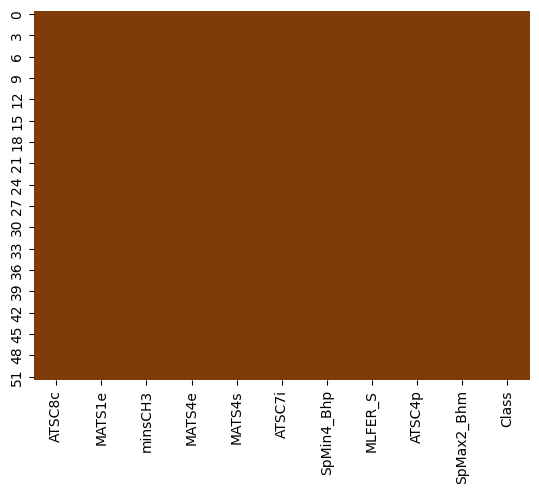

In [12]:
sns.heatmap(df_cleaned.isnull(),cbar=False,cmap='PuOr')


c:\Users\Theerthan Vasudevan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Theerthan Vasudevan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Theerthan Vasudevan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Theerthan Vasudevan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.

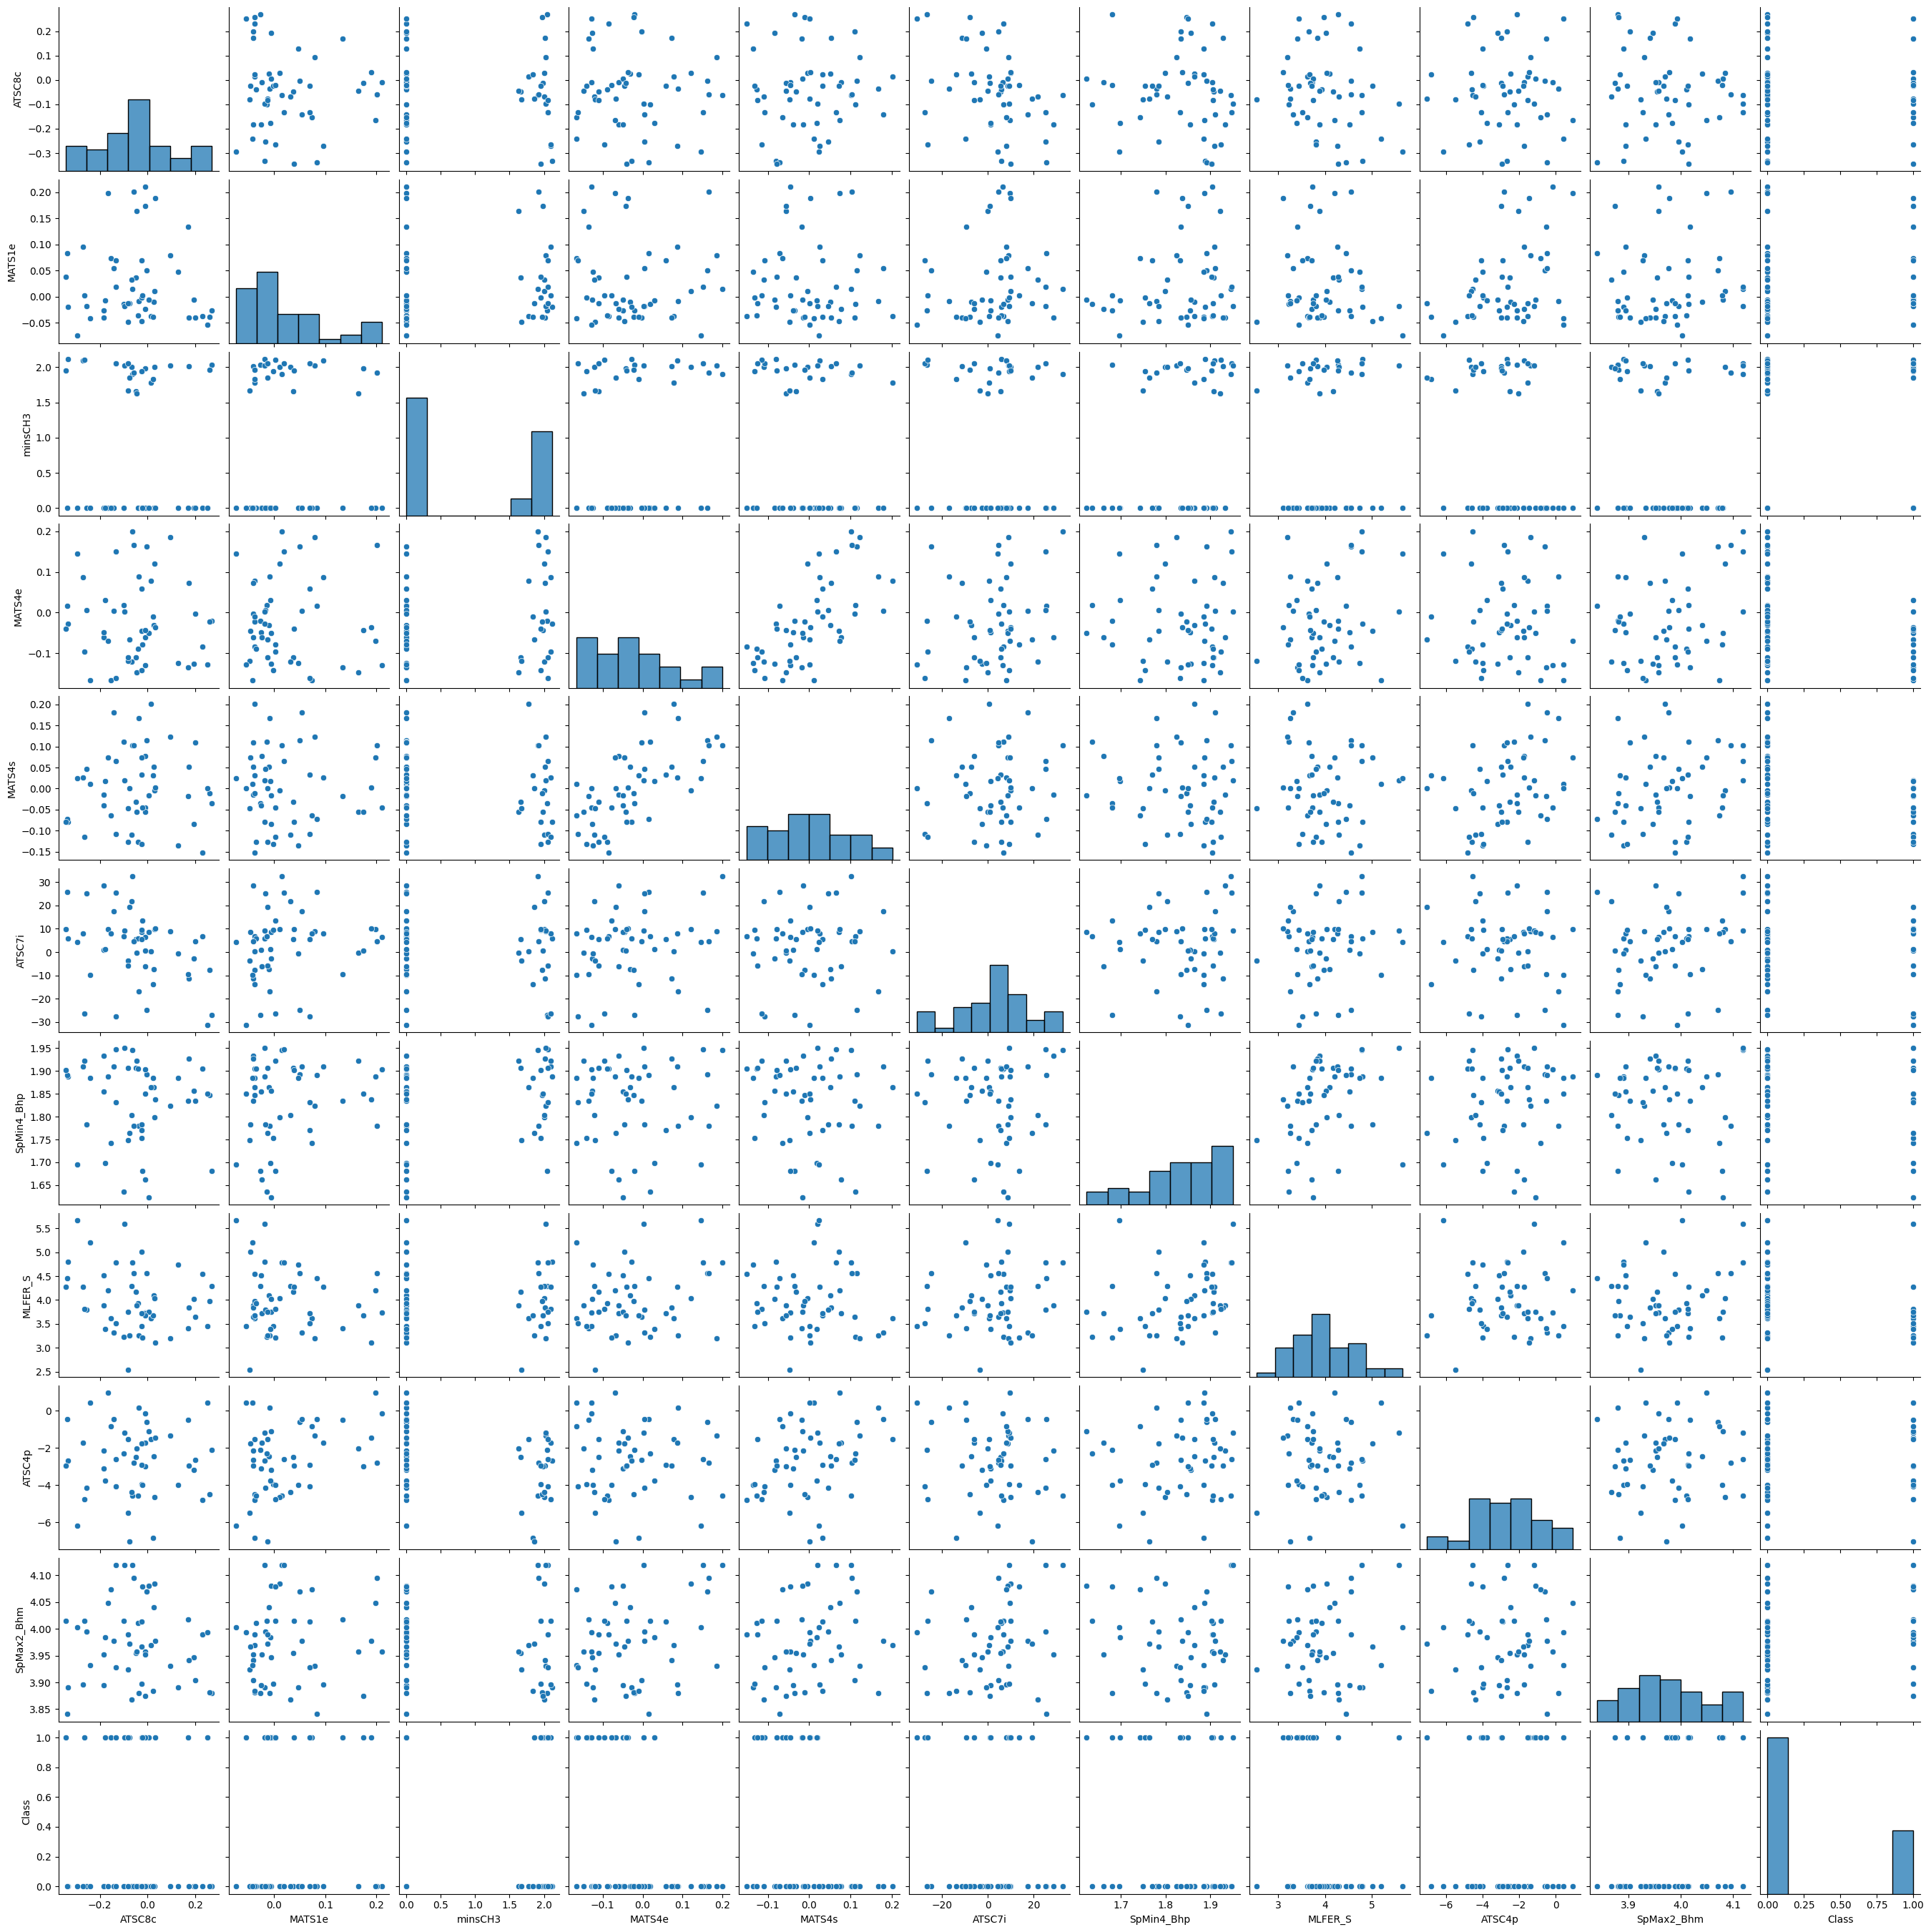

In [13]:
sns.pairplot(df_cleaned)

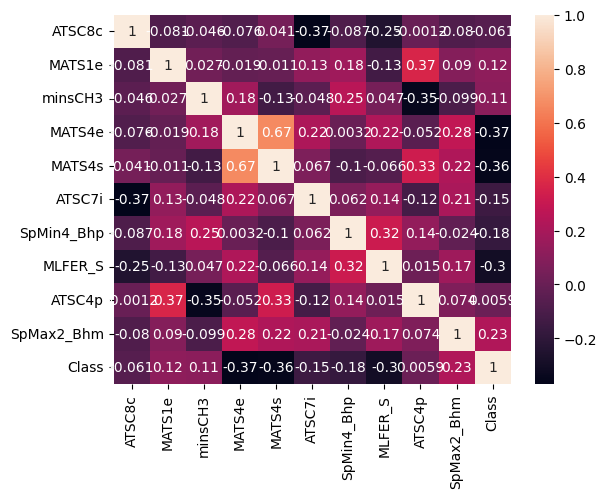

In [14]:
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

FEATURE ENGINEERING

In [24]:
df_cleaned.Class.unique()

array([0, 1], dtype=int64)

In [25]:
pd.get_dummies(df_cleaned['Class']).head()

,0,1
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [26]:
Class=pd.get_dummies(df_cleaned['Class'],drop_first=True)
Class.head() , Class.tail()
#1 represent Changer and 0 represent NoChanger

(       1
 0  False
 1  False
 2  False
 3  False
 4  False,
         1
 47   True
 48   True
 49  False
 50   True
 51   True)

LOGISTIC REGRESSION

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [28]:
model=LogisticRegression()

In [29]:
X=df_cleaned.drop(columns=['Class'])
y=df_cleaned['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

model.fit(X,y)
predictions= model.predict(X_test)
score=accuracy_score(y_test,predictions)
predictions
score

0.5625

In [30]:
y_out = model.predict(X_test)
y_out

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [31]:
print(classification_report(y_test , y_out))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         7
           1       1.00      0.22      0.36         9

    accuracy                           0.56        16
   macro avg       0.75      0.61      0.52        16
weighted avg       0.78      0.56      0.50        16



In [81]:
from sklearn import svm
from sklearn.metrics import classification_report

In [82]:
feature_dp=df_cleaned[['ATSC8c'	,'MATS1e'	,'minsCH3',	'MATS4e'	,'MATS4s'	,'ATSC7i'	,'SpMin4_Bhp'	,'MLFER_S'	,'ATSC4p'	,'SpMax2_Bhm']]
X=np.asarray(feature_dp)
y=np.asarray(df_cleaned['Class'])

In [83]:
classify=svm.SVC(kernel='linear',gamma='auto',C=2)
classify.fit(X_train,y_train)
y_outs=classify.predict(X_test)

In [84]:
print(classification_report(y_test,y_outs))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.67      0.22      0.33         9

    accuracy                           0.70        27
   macro avg       0.69      0.58      0.57        27
weighted avg       0.69      0.70      0.65        27

